## Master Thesis - Predicting Stress using Ordinal Regression Techniques

In this notebook you will find the code for which I acquire the results of my Master Thesis. The data used for this research can be found in the following link:
https://www.kaggle.com/datasets/ydalat/lifestyle-and-wellbeing-data

## Step 1. Importing packages

To begin the analysis I first have to import all the necessary packages for preprocessing. First I import the Pandas for data manipulation and analysis of the thesis. Next I import NumPy for array and matrix manipulation. For example, during this project numpy is used for initialization of random parameters and generating cross validation folds. One other library is OS, which is an package that deals with (identifying and setting) directories. Finally, matplotlib and seaborn are both packages that are used in plotting of the visualisations. 

In [1]:
import pandas as pd
import numpy as np
import os as os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math

Importing data.

In [2]:
data = pd.read_excel('C:\\Users\\erikb\\Downloads\\Lifestyle-and-Wellbeing data.xlsx')

###  Dataset description
The Lifestyle and Wellbeing data contains survey responses from the website of authentic-happiness.com. This survey is a questionnaire on various attributes on how people lead their lives. Consequently, the original authors computed a work-life balance score to give individuals insights into how balanced their life is. In total there are 15972 survey responses and 24 attributes and responses are filled in from July 2015 until March 2021.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15971 non-null  float64
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIFE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

## Step 2. Setting a Seed

I set a seed for reproduction purposes, so that the same numbers are generated on multiple code executions.

In [4]:
my_seed = 141
np.random.seed(my_seed)

## Step 3. Preprocessing

First, I want to see how the dataset actually looks.

In [5]:
data.head(n = 10)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2.0,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,6095
1,7/7/15,2,3.0,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,6556
2,7/7/15,2,3.0,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,6316
3,7/7/15,3,3.0,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,6227
4,7/7/15,5,1.0,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,6639
5,7/8/15,3,2.0,3,9,10,10,2,3,1,...,8,0,2,2,10,8,3,51 or more,Female,7223
6,7/8/15,4,2.0,10,6,10,10,3,5,2,...,7,10,0,2,10,8,10,51 or more,Male,7272
7,7/9/15,3,4.0,5,3,5,7,4,0,1,...,6,0,2,2,8,2,2,21 to 35,Female,6762
8,7/9/15,5,3.0,6,4,3,3,5,4,1,...,10,0,2,2,10,3,10,21 to 35,Female,7028
9,7/10/15,4,4.0,2,6,10,10,0,4,2,...,6,0,0,1,3,8,1,51 or more,Female,6344


Second, I review the amount of missing values in the dataset.

In [6]:
data.isna().sum()

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               1
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIFE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

There is only 1 missing value, which is very nice. Now I use the .loc function to find which column contains the missing value.

In [7]:
data.loc[data["DAILY_STRESS"].isnull()]

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
10005,12/18/18 10:37,3,NaN,1,2,10,10,5,5,2,...,6,10,1,2,10,8,2,21 to 35,Male,6826


Column 10005 contains the missing value of the 'DAILY_STRESS' variable, therefore I drop this column.

In [8]:
data = data.drop([10005])

Below I review the distribution of the dependent variable 'DAILY_STRESS', this is a check for class imbalance.

[Text(0, 0, 'No stress'),
 Text(1, 0, 'Normal stress'),
 Text(2, 0, 'Mild stress'),
 Text(3, 0, 'Moderate stress'),
 Text(4, 0, 'Severe stress'),
 Text(5, 0, 'Extremely severe stress')]

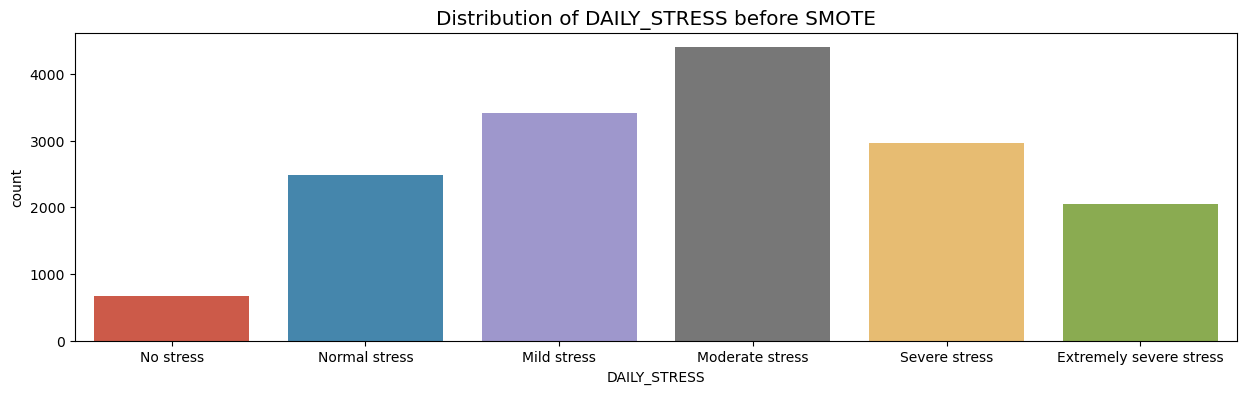

In [9]:
stress_labels = ["No stress", "Normal stress", "Mild stress", "Moderate stress", "Severe stress", "Extremely severe stress"]

fig, ax = plt.subplots(figsize = (15,4))

plt.style.use('ggplot')
sns.countplot(x = data["DAILY_STRESS"])
ax.set_title("Distribution of DAILY_STRESS before SMOTE")
ax.set_xticklabels(stress_labels)

The figure implies that the classes are heavily imbalanced, which provides an argument to merge certain classes together.

In [10]:
values_DS_old, counts_DS_old = np.unique(data["DAILY_STRESS"], return_counts = True)

In [11]:
print("There are", counts_DS_old[0], "occurrences of the value:", values_DS_old[0])
print("There are", counts_DS_old[1], "occurrences of the value:", values_DS_old[1])
print("There are", counts_DS_old[2], "occurrences of the value:", values_DS_old[2])
print("There are", counts_DS_old[3], "occurrences of the value:", values_DS_old[3])
print("There are", counts_DS_old[4], "occurrences of the value:", values_DS_old[4])
print("There are", counts_DS_old[5], "occurrences of the value:", values_DS_old[5])

There are 676 occurrences of the value: 0.0
There are 2478 occurrences of the value: 1.0
There are 3407 occurrences of the value: 2.0
There are 4398 occurrences of the value: 3.0
There are 2960 occurrences of the value: 4.0
There are 2052 occurrences of the value: 5.0


First, I will drop some of the columns which are irrelevant for my further findings.

In [12]:
data['YEAR'] = pd.DatetimeIndex(data['Timestamp']).year

In [13]:
data = data.drop(['Timestamp', 'WORK_LIFE_BALANCE_SCORE'], axis=1)

Next, I will recode some of the variables since these variables can be changed from a nominal value to a number which makes it easier to interpret in the further findings.

In [14]:
age_dict = {'Less than 20' : 1, '21 to 35' : 2, '36 to 50' : 3, '51 or more' : 4}
data['AGE'] = pd.Series([age_dict[x] for x in data.AGE], index=data.index)
gender_dict = {'Female' : 1, 'Male' : 0}
data['GENDER'] = pd.Series([gender_dict[x] for x in data.GENDER], index=data.index)
stress_dict = {0.0 : 1, 1.0 : 1, 2.0 : 2, 3.0 : 2, 4.0 : 3, 5.0 : 3}
data['DAILY_STRESS'] = pd.Series([stress_dict[x] for x in data.DAILY_STRESS], index=data.index)
data['DAILY_STRESS'] = data['DAILY_STRESS'].astype(int)

The dependent variable 'DAILY_STRESS' is merged into three classes instead of 6 classes. Furthermore the features 'GENDER' and 'AGE' are recoded for computational purposes.

## Step 4. Visualization

For the visualization part of the notebook, I will first look into how each of the individual features are correlated with one another. If it appears that there is multicollinearity between the various independent features, some features will be removed.

<AxesSubplot:title={'center':'Features correlation matrix'}>

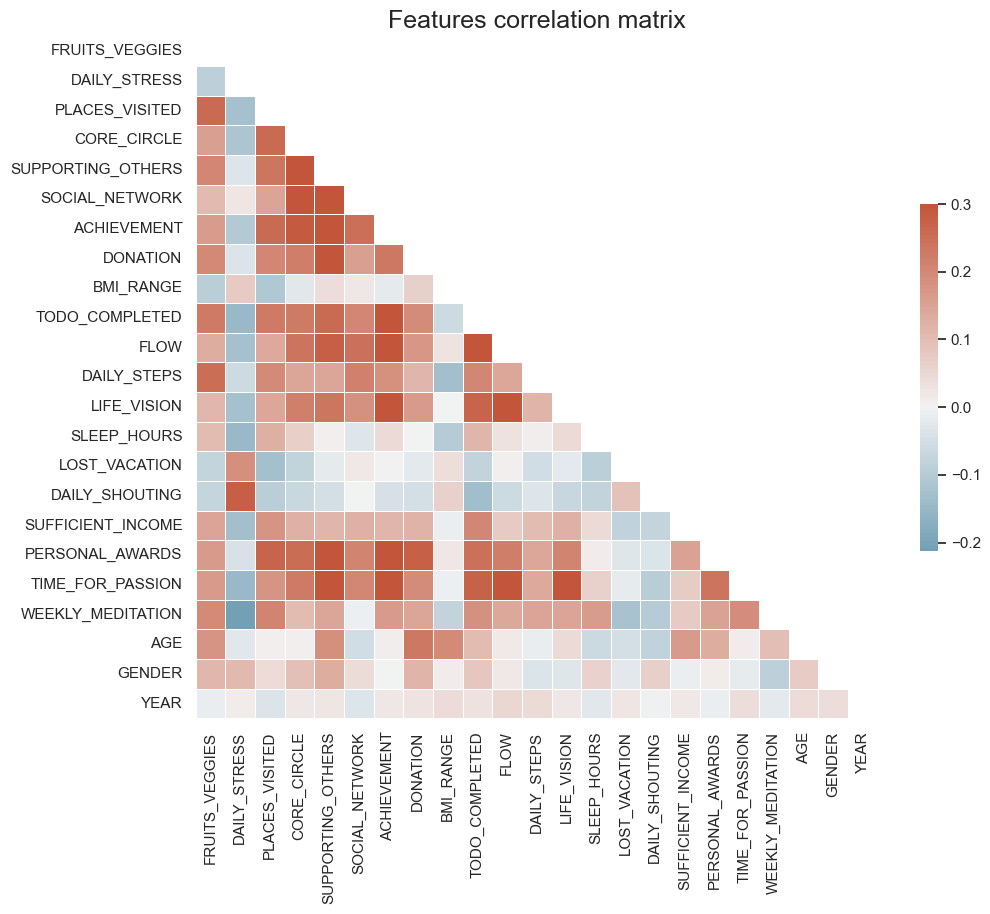

In [15]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Features correlation matrix", fontsize = 18)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
plt.style.use('ggplot')

Now the distribution of the dependent variable is reviewed, because I've recoded it into three classes. As can be seen, the classes are less imbalanced than before.

## Step 5. Analysis

Making a function to calculate CEMord

In [17]:
def CEMord(cm1, cm2, val_set):
    
    prox11 = np.log((1/((cm2[0,0]/2)/(val_set.size))))
    prox12 = np.log((1/(((cm2[1,1]/2) + cm2[0,0])/(val_set.size))))
    prox13 = np.log((1/(((cm2[2,2]/2) + cm2[0,0] + cm2[1,1])/(val_set.size))))

    prox21 = np.log((1/(((cm2[0,0]/2) + cm2[1,1])/(val_set.size))))
    prox22 = np.log((1/((cm2[1,1]/2)/(val_set.size))))
    prox23 = np.log((1/(((cm2[2,2]/2) + cm2[1,1])/(val_set.size))))

    prox31 = np.log((1/(((cm2[0,0]/2) + cm2[1,1] + cm2[2,2])/(val_set.size))))
    prox32 = np.log((1/(((cm2[1,1]/2) + cm2[2,2])/(val_set.size))))
    prox33 = np.log((1/((cm2[2,2]/2)/(val_set.size))))
    
    proximity = np.asarray([[prox11, prox12, prox13],
                            [prox21, prox22, prox23],
                            [prox31, prox32, prox33]])

    CEMord_final = (np.sum((cm1 * proximity)) / ((cm2[0,0] * prox11) + (cm2[1,1] * prox22) + 
                                              (cm2[2,2] * prox33)))
    return CEMord_final

Oversampling technique on the train set

In [18]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = data.drop(["DAILY_STRESS"], axis = 1)
Y = data["DAILY_STRESS"]

oversample = SMOTE()

X_train, X_test_HO, y_train, y_test_HO = train_test_split(X, Y, random_state = 0, stratify = Y)

X_train1, y_train1 = oversample.fit_resample(X_train, y_train)

In [19]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from imblearn.metrics import macro_averaged_mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from statistics import variance

In [20]:
import copy

X_SVR = copy.deepcopy(X_train1)
Y_SVR = copy.deepcopy(y_train1)

In [21]:
import time
start_time = time.time()

### KNN

In [24]:
def get_importances_knn(model, std_score, Xtest, ytest, features):
    feats_knn = {}
    for feature1 in features:
        X_test_feat = Xtest.copy()
        X_test_feat[feature1] = np.random.permutation(X_test_feat[feature1])
        feature_importance = (std_score - model.score(X_test_feat, ytest))
        if feature_importance > 0:
            feats_knn[feature1] = feature_importance
    return feats_knn

In [25]:
X_KNN = copy.deepcopy(X_train1)
Y_KNN = copy.deepcopy(y_train1)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
#Creating KFolds
kf = StratifiedKFold(n_splits = 10, shuffle = True)

#KNN preparation including Grid making
# Value of Neighbors 
n_neighbors = [1, 3, 5, 10, 25, 50, 100]
# P
p = [1,2]

hyperparameters = dict(n_neighbors=n_neighbors, p=p)

accuracy_knn = []
variance_knn = []

for i, (train_index, test_index) in enumerate(kf.split(X_KNN, Y_KNN)):
    #Show the folds
    print(f"Fold {i}:")
    print(f"   Train: index={train_index}")
    print(f"   Test:  index={test_index}")
    
    #Split original train-data into train/val for the KNN classifier
    X_train_knn, X_val_knn, y_train_knn, y_val_knn = X_KNN.iloc[train_index[0:-1]], X_KNN.iloc[test_index[0:-1]], Y_KNN.iloc[train_index[0:-1]], Y_KNN.iloc[test_index[0:-1]]
    
    y_val_knn[test_index[2]] = 1
    y_val_knn[test_index[3]] = 2
    y_val_knn[test_index[4]] = 3
    
    #Grid Search
    knn2 = KNeighborsClassifier()
    clf_knn = GridSearchCV(estimator = knn2, param_grid = hyperparameters, cv = 3, verbose=2, n_jobs = -1)
    
    #Determining best model
    model_knn = clf_knn.fit(X_train_knn, y_train_knn)
    best_parameters_knn = model_knn.best_params_
    optimized_knn = model_knn.best_estimator_
    print(f"Fold {i} parameters:",best_parameters_knn)
    
    #Making predictions
    modelknn_random = optimized_knn.fit(X_train_knn, y_train_knn)
    pred_knn = modelknn_random.predict(X_val_knn)
    pred_stress_knn = [int(np.round(x)) for x in pred_knn]
    print(f"Fold {i} accuracy KNN:",accuracy_score(y_val_knn, pred_stress_knn))
    
    #Metrics of fold
    accuracy_knn.append(accuracy_score(y_val_knn, pred_stress_knn))
    variance_knn.append(variance(pred_stress_knn))
    
print("My program took", time.time() - start_time, "to run")

Fold 0:
   Train: index=[    0     1     2 ... 17559 17560 17561]
   Test:  index=[    3    25    30 ... 17535 17557 17558]
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fold 0 parameters: {'n_neighbors': 1, 'p': 1}


C:\Users\erikb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 0 accuracy KNN: 0.7682232346241458
Fold 1:
   Train: index=[    0     1     2 ... 17559 17560 17561]
   Test:  index=[   31    33    37 ... 17530 17531 17550]
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fold 1 parameters: {'n_neighbors': 1, 'p': 1}


C:\Users\erikb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 1 accuracy KNN: 0.7568337129840547
Fold 2:
   Train: index=[    0     1     2 ... 17559 17560 17561]
   Test:  index=[    4     5     8 ... 17543 17551 17553]
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fold 2 parameters: {'n_neighbors': 1, 'p': 1}


C:\Users\erikb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 2 accuracy KNN: 0.764102564102564
Fold 3:
   Train: index=[    0     1     2 ... 17559 17560 17561]
   Test:  index=[   15    24    39 ... 17533 17538 17556]
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fold 3 parameters: {'n_neighbors': 1, 'p': 1}


C:\Users\erikb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 3 accuracy KNN: 0.7572649572649572
Fold 4:
   Train: index=[    1     3     4 ... 17558 17559 17561]
   Test:  index=[    0     2    16 ... 17546 17554 17560]
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fold 4 parameters: {'n_neighbors': 1, 'p': 1}


C:\Users\erikb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 4 accuracy KNN: 0.7572649572649572
Fold 5:
   Train: index=[    0     1     2 ... 17558 17559 17560]
   Test:  index=[   69    91    96 ... 17548 17555 17561]
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fold 5 parameters: {'n_neighbors': 1, 'p': 1}


C:\Users\erikb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 5 accuracy KNN: 0.7589743589743589
Fold 6:
   Train: index=[    0     1     2 ... 17559 17560 17561]
   Test:  index=[   12    18    21 ... 17477 17491 17521]
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fold 6 parameters: {'n_neighbors': 1, 'p': 1}


C:\Users\erikb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 6 accuracy KNN: 0.7555555555555555
Fold 7:
   Train: index=[    0     1     2 ... 17559 17560 17561]
   Test:  index=[    6    10    13 ... 17522 17534 17542]
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fold 7 parameters: {'n_neighbors': 1, 'p': 1}


C:\Users\erikb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 7 accuracy KNN: 0.7578347578347578
Fold 8:
   Train: index=[    0     2     3 ... 17558 17560 17561]
   Test:  index=[    1    11    14 ... 17544 17549 17559]
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fold 8 parameters: {'n_neighbors': 1, 'p': 1}


C:\Users\erikb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Fold 8 accuracy KNN: 0.7544159544159544
Fold 9:
   Train: index=[    0     1     2 ... 17559 17560 17561]
   Test:  index=[    7    26    27 ... 17518 17525 17552]
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fold 9 parameters: {'n_neighbors': 1, 'p': 1}
Fold 9 accuracy KNN: 0.7367521367521368
My program took 189.06638193130493 to run


C:\Users\erikb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [29]:
cv_results_knn = pd.DataFrame(model_knn.cv_results_)

In [30]:
cv_results_knn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004663,0.000472,3.935883,0.062360,1,1,"{'n_neighbors': 1, 'p': 1}",0.705637,0.714503,0.806948,0.742362,0.045812,1
1,0.003997,0.000002,1.757144,0.020833,1,2,"{'n_neighbors': 1, 'p': 2}",0.687986,0.702544,0.800304,0.730278,0.049871,2
2,0.005667,0.001248,4.138216,0.017663,3,1,"{'n_neighbors': 3, 'p': 1}",0.621560,0.637623,0.744115,0.667766,0.054384,3
3,0.008002,0.000002,2.041808,0.040089,3,2,"{'n_neighbors': 3, 'p': 2}",0.586829,0.610099,0.715642,0.637523,0.056049,4
4,0.008933,0.000732,4.361162,0.151862,5,1,"{'n_neighbors': 5, 'p': 1}",0.578478,0.608390,0.677677,0.621515,0.041547,5
5,0.008102,0.000147,2.057457,0.108703,5,2,"{'n_neighbors': 5, 'p': 2}",0.559689,0.589598,0.655657,0.601648,0.040095,6
6,0.008663,0.001695,4.207839,0.092362,10,1,"{'n_neighbors': 10, 'p': 1}",0.541659,0.577828,0.623766,0.581084,0.033599,7
7,0.010664,0.001248,2.075898,0.069612,10,2,"{'n_neighbors': 10, 'p': 2}",0.520782,0.561503,0.603645,0.561977,0.033830,8
8,0.007716,0.000456,3.990618,0.045882,25,1,"{'n_neighbors': 25, 'p': 1}",0.511482,0.551063,0.571185,0.544577,0.024801,9
9,0.007660,0.000464,2.397014,0.114482,25,2,"{'n_neighbors': 25, 'p': 2}",0.495540,0.533979,0.550114,0.526544,0.022892,11


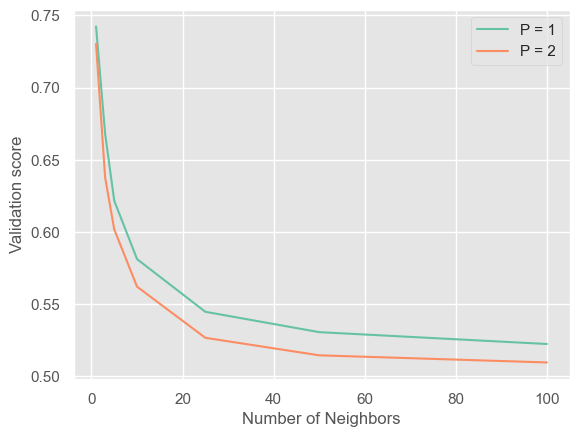

In [31]:
fig, ax = plt.subplots()

plt.style.use('ggplot')

sns.lineplot(data = cv_results_knn, x = 'param_n_neighbors', y = 'mean_test_score', hue = 'param_p', palette = 'Set2')
ax.set_xlabel("Number of Neighbors")
ax.set_ylabel("Validation score")
ax.legend(['P = 1', 'P = 2'])

In [32]:
print(np.mean(accuracy_knn))
print(np.mean(variance_knn))

0.7567222189773443
0.77967737847131


### Test-set evaluation KNN

In [33]:
pred_knn_final = modelknn_random.predict(X_test_HO)
pred_stress_knn_final = [int(np.round(x)) for x in pred_knn_final]

print(accuracy_score(y_test_HO, pred_stress_knn_final))

0.47458051590282996


C:\Users\erikb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
feats_knn_final = get_importances_knn(modelknn_random, accuracy_score(y_test_HO, pred_stress_knn_final), X_test_HO, y_test_HO, modelknn_random.feature_names_in_)

C:\Users\erikb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\erikb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [35]:
features_knn = {k: v for k, v in sorted(feats_knn_final.items(), key=lambda item: item[1])}

feature_values_knn = list(features_knn.values())
feature_names_knn = list(features_knn.keys())

In [36]:
cm_knn_final = confusion_matrix(y_test_HO, pred_stress_knn_final)
cm_knn_true_final = confusion_matrix(y_test_HO, y_test_HO)

print("Accuracy KNN:", accuracy_score(y_test_HO, pred_stress_knn_final))
print("CEMord KNN:", CEMord(cm_knn_final, cm_knn_true_final, y_test_HO))
print("MAEm KNN:", macro_averaged_mean_absolute_error(y_test_HO, pred_stress_knn_final))
print("Cohens Kappa KNN:", cohen_kappa_score(y_test_HO, pred_stress_knn_final, weights = 'quadratic'))

Accuracy KNN: 0.47458051590282996
CEMord KNN: 0.6165813477405686
MAEm KNN: 0.6593244939263921
Cohens Kappa KNN: 0.23703283655722274


### Ordered Logit Model

The Ordered Logit Model is an extension to a Logistic Regression, but in this case it allow for more than 2 classes. Since the dependent variable is divided into three classes, this is a perfect model. Furthermore, it reviews the order of the classes of the dependent variable and shows in its output whether the model is able to correctly distinguish the classes.

https://analyticsindiamag.com/a-complete-tutorial-on-ordinal-regression-in-python/

In [37]:
X_OLM = copy.deepcopy(X_train1)
Y_OLM = copy.deepcopy(y_train1)

stress_dict = {1: 'Mild stress', 2: 'Moderate stress', 3: 'Severe stress'}
Y_OLM = pd.Series([stress_dict[x] for x in Y_OLM], index=Y_OLM.index)
Y_OLM = Y_OLM.astype("category")
Y_OLM = Y_OLM.cat.set_categories(["Mild stress", "Moderate stress", "Severe stress"], ordered=True)

In [38]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

#Creating KFolds
kf = StratifiedKFold(n_splits = 10, shuffle = False)

accuracy_olm = []
variance_olm = []

for i, (train_index, test_index) in enumerate(kf.split(X_OLM, Y_OLM)):
    #Show the folds
    print(f"Fold {i}:")
    print(f"   Train: index={train_index}")
    print(f"   Test:  index={test_index}")
    
    #Split original train-data into train/val
    X_train_olm1, X_val_olm1, y_train_olm1, y_val_olm1 = X_OLM.iloc[train_index[0:-1]], X_OLM.iloc[test_index[0:-1]], Y_OLM.iloc[train_index[0:-1]], Y_OLM.iloc[test_index[0:-1]]
    
    model_olm = OrderedModel(y_train_olm1, X_train_olm1, distr='logit')
    model_olm = model_olm.fit(method = 'bfgs')
    model_olm.summary()
    
    #Feature importance based on t-values
    tvalues = model_olm.tvalues
    tvalues = abs(tvalues)
    tvalues = tvalues.sort_values()
    names = list(tvalues.index)

    feature_list_OLM = []
    feature_importance_OLM = []

    for j in tvalues.index:
        if j == 'Mild stress/Moderate stress':
            continue
        if j == 'Moderate stress/Severe stress':
            continue
        if j in feature_list_OLM:
            continue
        if tvalues[j] > 2:
            feature_list_OLM.append(j)
            feature_importance_OLM.append(tvalues[j])
    
    #Make new dataset based on features
    Y_OLM_new = copy.deepcopy(Y_OLM)
    X_OLM_new = copy.deepcopy(X_OLM[feature_list_OLM])

    X_train_olm, X_val_olm, y_train_olm, y_val_olm = X_OLM_new.iloc[train_index[0:-1]], X_OLM_new.iloc[test_index[0:-1]], Y_OLM_new.iloc[train_index[0:-1]], Y_OLM_new.iloc[test_index[0:-1]]
    
    y_val_olm[test_index[2]] = "Mild stress"
    y_val_olm[test_index[3]] = "Moderate stress"
    y_val_olm[test_index[4]] = "Severe stress"
    
    #Fit new model with best performing features
    mod_logit = OrderedModel(y_train_olm, X_train_olm, distr='logit')
    res_logit = mod_logit.fit(method='bfgs')
    
    #Making predictions
    predicted_olm = res_logit.model.predict(res_logit.params, exog=X_val_olm)
    y_val_olm = y_val_olm.astype("category")
    y_val_olm = y_val_olm.cat.set_categories(['Mild stress', 'Moderate stress', 'Severe stress'], ordered=False)
    y_val_olm = y_val_olm.astype('str')
    
    pred_stress_olm = list(predicted_olm.argmax(1))
    pred_stress_olm = [int(np.round(x)) for x in pred_stress_olm]
    y_val_olm_new = []

    for values in y_val_olm:
        if values == "Mild stress":
            y_val_olm_new.append(0)
        elif values == "Moderate stress":
            y_val_olm_new.append(1)
        else:
            y_val_olm_new.append(2)
            
    y_val_olm_new = [int(np.round(x)) for x in y_val_olm_new]

    print(f"Fold {i} accuracy OLM:",accuracy_score(y_val_olm_new, pred_stress_olm))
    
    #Metrics of fold
    accuracy_olm.append(accuracy_score(y_val_olm_new, pred_stress_olm))
    variance_olm.append(variance(pred_stress_olm))
    
print("My program took", time.time() - start_time, "to run")

Fold 0:
   Train: index=[ 1190  1192  1193 ... 17559 17560 17561]
   Test:  index=[   0    1    2 ... 3075 3081 3083]
Optimization terminated successfully.
         Current function value: 0.955020
         Iterations: 62
         Function evaluations: 67
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 0.955402
         Iterations: 58
         Function evaluations: 64
         Gradient evaluations: 64


C:\Users\erikb\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


Fold 0 accuracy OLM: 0.5079726651480638
Fold 1:
   Train: index=[    0     1     2 ... 17559 17560 17561]
   Test:  index=[1190 1192 1193 ... 6005 6006 6012]
Optimization terminated successfully.
         Current function value: 0.956173
         Iterations: 60
         Function evaluations: 66
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 0.956476
         Iterations: 58
         Function evaluations: 64
         Gradient evaluations: 64


C:\Users\erikb\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


Fold 1 accuracy OLM: 0.5142369020501139
Fold 2:
   Train: index=[    0     1     2 ... 17559 17560 17561]
   Test:  index=[2375 2378 2379 ... 8904 8905 8909]
Optimization terminated successfully.
         Current function value: 0.954988
         Iterations: 60
         Function evaluations: 66
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 0.955136
         Iterations: 60
         Function evaluations: 66
         Gradient evaluations: 66


C:\Users\erikb\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


Fold 2 accuracy OLM: 0.5213675213675214
Fold 3:
   Train: index=[    0     1     2 ... 17559 17560 17561]
   Test:  index=[ 3564  3569  3572 ... 11849 11858 11865]
Optimization terminated successfully.
         Current function value: 0.954472
         Iterations: 60
         Function evaluations: 66
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 0.954600
         Iterations: 60
         Function evaluations: 66
         Gradient evaluations: 66


C:\Users\erikb\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


Fold 3 accuracy OLM: 0.5282051282051282
Fold 4:
   Train: index=[    0     1     2 ... 17559 17560 17561]
   Test:  index=[ 4783  4784  4786 ... 12539 12540 12541]
Optimization terminated successfully.
         Current function value: 0.958363
         Iterations: 62
         Function evaluations: 67
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 0.958552
         Iterations: 58
         Function evaluations: 63
         Gradient evaluations: 63


C:\Users\erikb\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


Fold 4 accuracy OLM: 0.5133903133903134
Fold 5:
   Train: index=[    0     1     2 ... 17559 17560 17561]
   Test:  index=[ 6028  6030  6031 ... 13124 13125 13126]
Optimization terminated successfully.
         Current function value: 0.959818
         Iterations: 61
         Function evaluations: 66
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 0.960070
         Iterations: 33
         Function evaluations: 35
         Gradient evaluations: 35


C:\Users\erikb\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


Fold 5 accuracy OLM: 0.5327635327635327
Fold 6:
   Train: index=[    0     1     2 ... 17559 17560 17561]
   Test:  index=[ 7240  7241  7242 ... 15803 15804 15805]
Optimization terminated successfully.
         Current function value: 0.958532
         Iterations: 63
         Function evaluations: 68
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 0.958853
         Iterations: 56
         Function evaluations: 62
         Gradient evaluations: 62


C:\Users\erikb\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


Fold 6 accuracy OLM: 0.5356125356125356
Fold 7:
   Train: index=[    0     1     2 ... 17559 17560 17561]
   Test:  index=[ 8407  8411  8412 ... 16389 16390 16391]
Optimization terminated successfully.
         Current function value: 0.954935
         Iterations: 62
         Function evaluations: 68
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 0.955260
         Iterations: 58
         Function evaluations: 64
         Gradient evaluations: 64


C:\Users\erikb\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


Fold 7 accuracy OLM: 0.5042735042735043
Fold 8:
   Train: index=[    0     1     2 ... 17559 17560 17561]
   Test:  index=[ 9624  9625  9627 ... 16974 16975 16976]
Optimization terminated successfully.
         Current function value: 0.955976
         Iterations: 63
         Function evaluations: 68
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 0.956167
         Iterations: 61
         Function evaluations: 67
         Gradient evaluations: 67


C:\Users\erikb\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


Fold 8 accuracy OLM: 0.5054131054131055
Fold 9:
   Train: index=[    0     1     2 ... 16974 16975 16976]
   Test:  index=[10780 10781 10782 ... 17559 17560 17561]
Optimization terminated successfully.
         Current function value: 0.958770
         Iterations: 61
         Function evaluations: 67
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 0.959041
         Iterations: 61
         Function evaluations: 67
         Gradient evaluations: 67
Fold 9 accuracy OLM: 0.5270655270655271
My program took 460.3248326778412 to run


C:\Users\erikb\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


In [39]:
print(np.mean(accuracy_olm))
print(np.mean(variance_olm))

0.5190300735289346
0.7030303007295914


### Test-set evaluation of OLM

In [40]:
y_test_HO_olm = copy.deepcopy(y_test_HO)

stress_dict = {1: 'Mild stress', 2: 'Moderate stress', 3: 'Severe stress'}
y_test_HO_olm = pd.Series([stress_dict[x] for x in y_test_HO_olm], index=y_test_HO_olm.index)
y_test_HO_olm = y_test_HO_olm.astype("category")
y_test_HO_olm = y_test_HO_olm.cat.set_categories(["Mild stress", "Moderate stress", "Severe stress"], ordered=True)

#Fit new model with best performing features
mod_logit = OrderedModel(y_test_HO_olm, X_test_HO[feature_list_OLM], distr='logit')
res_logit = mod_logit.fit(method='bfgs')
res_logit.summary()

Optimization terminated successfully.
         Current function value: 0.935438
         Iterations: 61
         Function evaluations: 63
         Gradient evaluations: 63


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                      y   Log-Likelihood:                -3735.2
Model:                   OrderedModel   AIC:                             7508.
Method:            Maximum Likelihood   BIC:                             7628.
Date:                Fri, 13 Jan 2023                                         
Time:                        13:47:32                                         
No. Observations:                3993                                         
Df Residuals:                    3974                                         
Df Model:                          19                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
AGE                               0.0033      0.036      0.091      0.928      -0.067       0.074
YEAR                              0.0048      0.017      0.275      0.783      -0.029       0.039
SUPPORTING_OTHERS                 0.0247      0.011      2.155      0.031       0.002       0.047
LIFE_VISION                      -0.0364      0.011     -3.449      0.001      -0.057      -0.016
TODO_COMPLETED                   -0.0487      0.014     -3.575      0.000      -0.075      -0.022
PERSONAL_AWARDS                   0.0262      0.011      2.351      0.019       0.004       0.048
TIME_FOR_PASSION                 -0.0337      0.014     -2.471      0.013      -0.060      -0.007
FLOW                             -0.0334      0.016     -2.113      0.035      -0.064      -0.002
CORE_CIRCLE                      -0.0542      0.012     -4.403      0.000      -0.078      -0.030
SUFFICIENT_INCOME                -0.3898      0.073     -5.343      0.000      -0.533      -0.247
SLEEP_HOURS                      -0.1376      0.028     -5.000      0.000      -0.191      -0.084
BMI_RANGE                         0.0239      0.065      0.368      0.713      -0.103       0.151
SOCIAL_NETWORK                    0.0196      0.011      1.739      0.082      -0.002       0.042
WEEKLY_MEDITATION                -0.0731      0.011     -6.560      0.000      -0.095      -0.051
GENDER                            0.4305      0.066      6.551      0.000       0.302       0.559
LOST_VACATION                     0.0822      0.009      9.262      0.000       0.065       0.100
DAILY_SHOUTING                    0.1845      0.012     14.923      0.000       0.160       0.209
Mild stress/Moderate stress       6.5404     35.223      0.186      0.853     -62.496      75.577
Moderate stress/Severe stress     0.9308      0.020     45.855      0.000       0.891       0.971
=================================================================================================
"""

In [41]:
#Making predictions
predicted_olm_final = res_logit.model.predict(res_logit.params, exog=X_test_HO[feature_list_OLM])
y_test_HO_olm = y_test_HO_olm.astype("category")
y_test_HO_olm = y_test_HO_olm.cat.set_categories(['Mild stress', 'Moderate stress', 'Severe stress'], ordered=False)
y_test_HO_olm = y_test_HO_olm.astype('str')
    
pred_stress_olm_final = predicted_olm_final.argmax(1)
y_test_HO_new = []

for values in y_test_HO_olm:
    if values == "Mild stress":
        y_test_HO_new.append(0)
    elif values == "Moderate stress":
        y_test_HO_new.append(1)
    else:
        y_test_HO_new.append(2)
        
y_test_HO_new = np.array(y_test_HO_new)

C:\Users\erikb\anaconda3\lib\site-packages\statsmodels\miscmodels\ordinal_model.py:419: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  xb = xb[:, None]


In [42]:
cm_olm_final = confusion_matrix(y_test_HO_new, pred_stress_olm_final)
cm_olm_true_final = confusion_matrix(y_test_HO_new, y_test_HO_new)

print("Accuracy OLM:", accuracy_score(y_test_HO_new, pred_stress_olm_final))
print("CEMord OLM:", CEMord(cm_olm_final, cm_olm_true_final, y_test_HO_new))
print("MAEm OLM:", macro_averaged_mean_absolute_error(y_test_HO_new, pred_stress_olm_final))
print("Cohens Kappa OLM:", cohen_kappa_score(y_test_HO_new, pred_stress_olm_final, weights = 'quadratic'))

Accuracy OLM: 0.5401953418482344
CEMord OLM: 0.6509054359790063
MAEm OLM: 0.5821499527377442
Cohens Kappa OLM: 0.3048981526535679


### Random Forest Regression

A Random Forest Regressor is a very adequate technique for non-linear data. Next to that it corrects for overfitting of decision trees because it uses multiple decision trees and has both overfitting as well as underfitting decision trees in its forest.

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
X_RF = copy.deepcopy(X_train1)
Y_RF = copy.deepcopy(y_train1)

In [45]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid_RF = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
# rF_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid_RF, cv = 3, n_iter = 50, verbose = 3, n_jobs = 1)
rf_GS = RandomizedSearchCV(estimator = rf, param_distributions = random_grid_RF, n_iter = 50, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_GS.fit(X_RF, Y_RF)
    
print(rf_GS.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [47]:
#Creating KFolds
kf = StratifiedKFold(n_splits = 10, shuffle = True)

accuracy_rf = []
variance_rf = []

# Number of trees in random forest
n_estimators = [500, 600, 700]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [15, 20, 25]
# Minimum number of samples required to split a node
min_samples_split = [2, 3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]
# Create the random grid
random_grid_RF = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

for i, (train_index, test_index) in enumerate(kf.split(X_RF, Y_RF)):
    #Show the folds
    print(f"Fold {i}:")
    print(f"   Train: index={train_index}")
    print(f"   Test:  index={test_index}")
    
    #Split original train-data into train/val for the KNN classifier
    X_train_rf, X_val_rf, y_train_rf, y_val_rf = X_RF.iloc[train_index[0:-1]], X_RF.iloc[test_index[0:-1]], Y_RF.iloc[train_index[0:-1]], Y_RF.iloc[test_index[0:-1]]
    
    y_val_rf[test_index[2]] = 1
    y_val_rf[test_index[3]] = 2
    y_val_rf[test_index[4]] = 3
    
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = GridSearchCV(estimator = rf, param_grid = random_grid_RF, cv = 3, verbose=2, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(X_train_rf, y_train_rf)
    
    optimized_RF = rf_random.best_estimator_
    best_parameters_rf = rf_random.best_params_
    modelRF_random = optimized_RF.fit(X_train_rf, y_train_rf)
    print(f"Fold {i} parameters:",best_parameters_rf)

    #Making predictions
    pred_rf = modelRF_random.predict(X_val_rf)
    pred_stress_rf = [int(np.round(x)) for x in pred_rf]
    print(f"Fold {i} accuracy:",accuracy_score(y_val_rf, pred_stress_rf))
    
    
    #Feature importance Gini
    feats_rf = {} # a dict to hold feature_name: feature_importance
    for feature, importance in zip(X_train_rf.columns, modelRF_random.feature_importances_):
        feats_rf[feature] = importance #add the name/value pair 
    
    #Metrics of fold
    accuracy_rf.append(accuracy_score(y_val_rf, pred_stress_rf))
    variance_rf.append(variance(pred_stress_rf))
    
print("My program took", time.time() - start_time, "to run")

Fold 0:
   Train: index=[    0     2     3 ... 17558 17559 17560]
   Test:  index=[    1    17    18 ... 17537 17546 17561]
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fold 0 parameters: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}
Fold 0 accuracy: 0.5973804100227791
Fold 1:
   Train: index=[    1     2     3 ... 17559 17560 17561]
   Test:  index=[    0    31    33 ... 17545 17550 17556]
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fold 1 parameters: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 600}
Fold 1 accuracy: 0.5899772209567198
Fold 2:
   Train: index=[    0     1     2 ... 17559 17560 17561]
   Test:  index=[   10    27    43 ... 17531 17542 17552]
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fold 2 parameters: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_e

In [48]:
print(np.mean(accuracy_rf))
print(np.mean(variance_rf))

0.5804451648073516
0.29325426290939544


### Test-set evaluation RF

In [49]:
features_rf = {k: v for k, v in sorted(feats_rf.items(), key=lambda item: item[1])}

feature_values_rf = list(features_rf.values())
feature_names_rf = list(features_rf.keys())

In [50]:
pred_rf_final = modelRF_random.predict(X_test_HO)
pred_stress_rf_final = [int(np.round(x)) for x in pred_rf_final]

In [51]:
cm_rf_final = confusion_matrix(y_test_HO, pred_stress_rf_final)
cm_rf_true_final = confusion_matrix(y_test_HO, y_test_HO)

print("Accuracy RF:", accuracy_score(y_test_HO, pred_stress_rf_final))
print("CEMord RF:", CEMord(cm_rf_final, cm_rf_true_final, y_test_HO))
print("MAEm RF:", macro_averaged_mean_absolute_error(y_test_HO, pred_stress_rf_final))
print("Cohens Kappa RF:", cohen_kappa_score(y_test_HO, pred_stress_rf_final, weights = 'quadratic'))

Accuracy RF: 0.5549711995992987
CEMord RF: 0.6569014358745866
MAEm RF: 0.5666547400465617
Cohens Kappa RF: 0.2884385957900216


### SVR

Hyperparameter choices based on: EvaluationofPerformanceMeasures forSVRHyperparameterSelection

In [52]:
#SVR preparation including Grid making
# Value of regularization parameter
C = [0.1, 1, 10, 100, 500]
# Kernel
kernel = ['rbf']
# Gamma
gamma = [0.001, 0.01, 0.1, 1]
# Epsilon
epsilon = [float(x) for x in np.linspace(start = 0.01, stop = 1.0, num = 10)]  # Candidates of epsilon

hyperparameters = dict(C=C,kernel=kernel, gamma=gamma, epsilon=epsilon)

svr = SVR()
svr_RS = RandomizedSearchCV(estimator = svr, param_distributions = hyperparameters, n_iter = 50, cv = 3, verbose=2, n_jobs = 1)
svr_RS.fit(X_SVR, Y_SVR)

print(svr_RS.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END .........C=100, epsilon=0.12, gamma=0.1, kernel=rbf; total time= 1.7min
[CV] END .........C=100, epsilon=0.12, gamma=0.1, kernel=rbf; total time=  31.7s
[CV] END .........C=100, epsilon=0.12, gamma=0.1, kernel=rbf; total time=  36.2s
[CV] END ........C=10, epsilon=0.45, gamma=0.001, kernel=rbf; total time=  11.4s
[CV] END ........C=10, epsilon=0.45, gamma=0.001, kernel=rbf; total time=  11.1s
[CV] END ........C=10, epsilon=0.45, gamma=0.001, kernel=rbf; total time=  10.4s
[CV] END .........C=1, epsilon=0.78, gamma=0.001, kernel=rbf; total time=   6.8s
[CV] END .........C=1, epsilon=0.78, gamma=0.001, kernel=rbf; total time=   6.4s
[CV] END .........C=1, epsilon=0.78, gamma=0.001, kernel=rbf; total time=   4.5s
[CV] END ........C=10, epsilon=0.67, gamma=0.001, kernel=rbf; total time=   7.8s
[CV] END ........C=10, epsilon=0.67, gamma=0.001, kernel=rbf; total time=   9.0s
[CV] END ........C=10, epsilon=0.67, gamma=0.00

In [54]:
#Creating KFolds
kf = KFold(n_splits = 10, shuffle = False)

#SVC preparation including Grid making
# Value of regularization parameter
C = [80, 100, 120]
# Kernel
kernel = ['rbf']
# Gamma
gamma = [0.08, 0.1, 0.12]
# Epsilon
epsilon = [0.10, 0.12, 0.14]  # Candidates of epsilon

hyperparameters = dict(C=C,kernel=kernel, gamma=gamma, epsilon=epsilon)

accuracy_svr = []
variance_svr = []

feats_svr = {}

for i, (train_index, test_index) in enumerate(kf.split(X_SVR)):
    #Show the folds
    print(f"Fold {i}:")
    print(f"   Train: index={train_index}")
    print(f"   Test:  index={test_index}")
    
    #Split original train-data into train/val for the KNN classifier
    X_train_svr, X_val_svr, y_train_svr, y_val_svr = X_SVR.iloc[train_index[0:-1]], X_SVR.iloc[test_index[0:-1]], Y_SVR.iloc[train_index[0:-1]], Y_SVR.iloc[test_index[0:-1]]
    
    y_val_svr[test_index[2]] = 1
    y_val_svr[test_index[3]] = 2
    y_val_svr[test_index[4]] = 3
    
    #Grid Search
    svr = SVR()
    clf_svr = GridSearchCV(estimator = svr, param_grid = hyperparameters, cv = 3, verbose=2, n_jobs = 1)
    
    #Determining best model
    model_svr = clf_svr.fit(X_train_svr, y_train_svr)
    optimized_svr = model_svr.best_estimator_
    best_parameters_svr = model_svr.best_params_
    print(f"Fold {i} parameters:", best_parameters_svr)
    
    #Making predictions
    modelsvr_random = optimized_svr.fit(X_train_svr, y_train_svr)
    pred_svr = modelsvr_random.predict(X_val_svr)
    pred_stress_svr = [int(np.round(x)) for x in pred_svr]
    print(f"Fold {i} accuracy SVR:",accuracy_score(y_val_svr, pred_stress_svr))
    
    for idx, j in enumerate(pred_stress_svr):
        if j == 0:
            pred_stress_svr[idx] = 1
        elif j == 4:
            pred_stress_svr[idx] = 3
        else:
            continue
        
    results = permutation_importance(modelsvr_random, X_train_svr, y_train_svr, scoring='r2')
    # get importance
    importances = results.importances_mean
    # summarize feature importance
    for feature, importance in zip(X_train_svr.columns, importances):
        feats_svr[feature] = importance #add the name/value pair 
    
    #Metrics
    accuracy_svr.append(accuracy_score(y_val_svr, pred_stress_svr))
    variance_svr.append(variance(pred_stress_svr))
    
print("My program took", time.time() - start_time, "to run")

Fold 0:
   Train: index=[ 1757  1758  1759 ... 17559 17560 17561]
   Test:  index=[   0    1    2 ... 1754 1755 1756]
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ..........C=80, epsilon=0.1, gamma=0.08, kernel=rbf; total time=  18.4s
[CV] END ..........C=80, epsilon=0.1, gamma=0.08, kernel=rbf; total time=  19.1s
[CV] END ..........C=80, epsilon=0.1, gamma=0.08, kernel=rbf; total time=  18.3s
[CV] END ...........C=80, epsilon=0.1, gamma=0.1, kernel=rbf; total time=  16.7s
[CV] END ...........C=80, epsilon=0.1, gamma=0.1, kernel=rbf; total time=  16.9s
[CV] END ...........C=80, epsilon=0.1, gamma=0.1, kernel=rbf; total time=  20.3s
[CV] END ..........C=80, epsilon=0.1, gamma=0.12, kernel=rbf; total time=  15.8s
[CV] END ..........C=80, epsilon=0.1, gamma=0.12, kernel=rbf; total time=  15.8s
[CV] END ..........C=80, epsilon=0.1, gamma=0.12, kernel=rbf; total time=  21.3s
[CV] END .........C=80, epsilon=0.12, gamma=0.08, kernel=rbf; total time=  16.8s
[CV] END ..

In [55]:
print(np.mean(accuracy_svr))
print(np.mean(variance_svr))

0.6648253606681853
0.2269778889797825


In [211]:
features_svr = {k: v for k, v in sorted(feats_svr.items(), key=lambda item: item[1])}

feature_values_svr = list(features_svr.values())
feature_names_svr = list(features_svr.keys())

In [57]:
pred_svr_final = modelsvr_random.predict(X_test_HO)
pred_stress_svr_final = [int(np.round(x)) for x in pred_svr_final]

print(accuracy_score(y_test_HO, pred_stress_svr_final))

0.5256699223641372


In [58]:
cm_svr_final = confusion_matrix(y_test_HO, pred_stress_svr_final)
cm_svr_true_final = confusion_matrix(y_test_HO, y_test_HO)

print("Accuracy SVR:", accuracy_score(y_test_HO, pred_stress_svr_final))
print("CEMord SVR:", CEMord(cm_svr_final, cm_svr_true_final, y_test_HO))
print("MAEm SVR:", macro_averaged_mean_absolute_error(y_test_HO, pred_stress_svr_final))
print("Cohens Kappa SVR:", cohen_kappa_score(y_test_HO, pred_stress_svr_final, weights = 'quadratic'))

Accuracy SVR: 0.5256699223641372
CEMord SVR: 0.627633631223407
MAEm SVR: 0.6170720026374591
Cohens Kappa SVR: 0.13602077458961181


### Performance comparison of models using Wilcoxon-Rank-Sum

In [198]:
from scipy.stats import mannwhitneyu

accuracy_svr_arr = np.array(accuracy_svr)
accuracy_knn_arr = np.array(accuracy_knn)
accuracy_olm_arr = np.array(accuracy_olm)
accuracy_rf_arr = np.array(accuracy_rf)

In [207]:
man = mannwhitneyu(accuracy_knn_arr, accuracy_svr_arr, alternative = 'greater')
man

MannwhitneyuResult(statistic=54.0, pvalue=0.3956300532015894)

In [200]:
man = mannwhitneyu(accuracy_svr_arr, accuracy_olm_arr, alternative = 'greater')
man

MannwhitneyuResult(statistic=100.0, pvalue=9.133589555477501e-05)

In [201]:
man = mannwhitneyu(accuracy_svr_arr, accuracy_rf_arr, alternative = 'greater')
man

MannwhitneyuResult(statistic=100.0, pvalue=9.133589555477501e-05)

In [202]:
man = mannwhitneyu(accuracy_knn_arr, accuracy_olm_arr, alternative = 'greater')
man

MannwhitneyuResult(statistic=100.0, pvalue=9.082557304573249e-05)

In [203]:
man = mannwhitneyu(accuracy_knn_arr, accuracy_rf_arr, alternative = 'greater')
man

MannwhitneyuResult(statistic=100.0, pvalue=9.082557304573249e-05)

In [204]:
man = mannwhitneyu(accuracy_rf_arr, accuracy_olm_arr, alternative = 'greater')
man

MannwhitneyuResult(statistic=80.0, pvalue=0.012874040410554032)

### Feature Importances

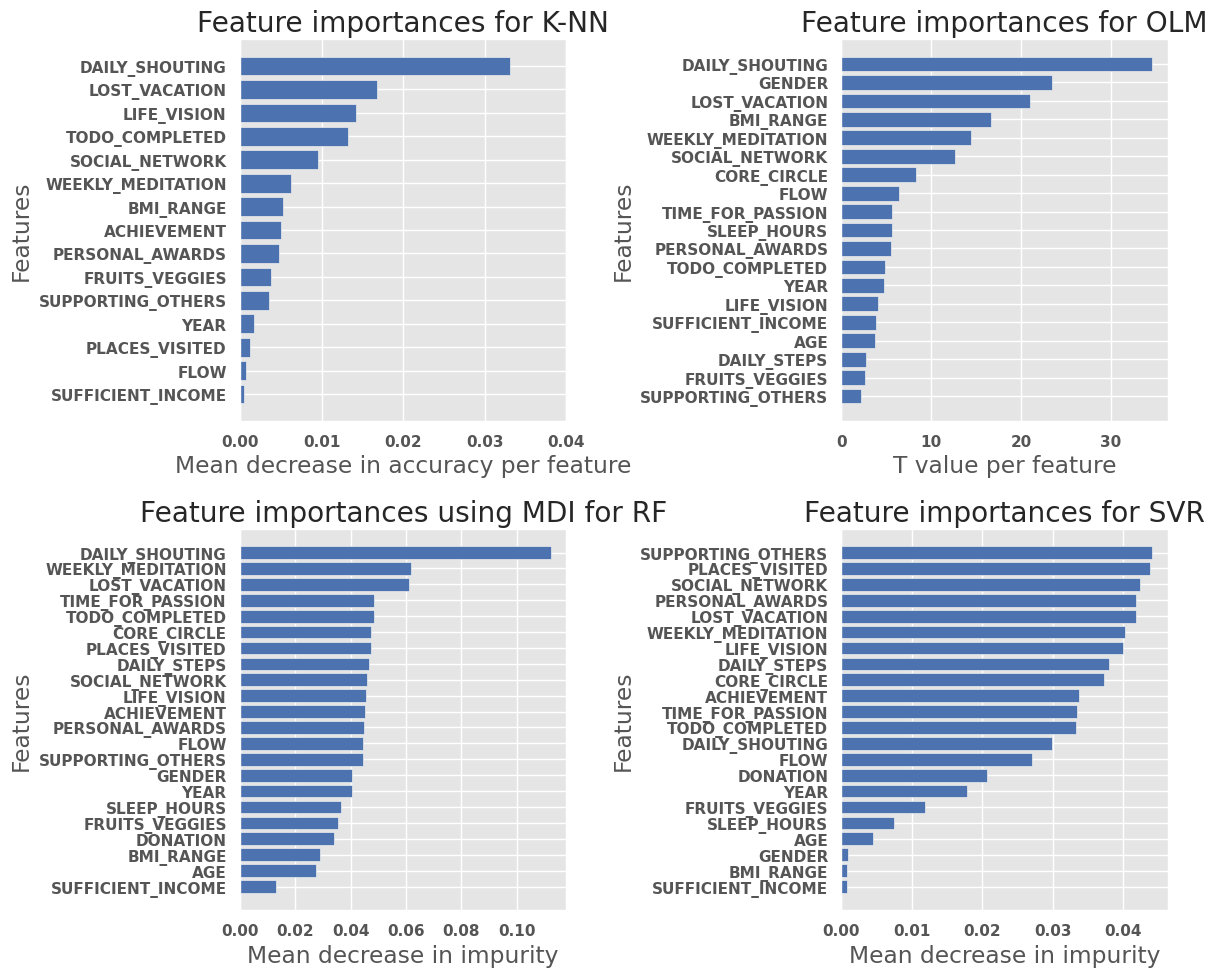

In [213]:
fig, ax = plt.subplots(2,2, figsize = (12,10))

ax[0,0].set_title("Feature importances for K-NN")
ax[0,0].set_xlabel("Mean decrease in accuracy per feature")
ax[0,0].set_xlim(0, 0.04)
ax[0,0].set_ylabel("Features")
ax[0,0].barh(y = feature_names_knn, width = feature_values_knn, color = 'b')

ax[0,1].set_title("Feature importances for OLM")
ax[0,1].set_xlabel("T value per feature")
ax[0,1].set_ylabel("Features")
ax[0,1].barh(y = feature_list_OLM, width = feature_importance_OLM, color = 'b')

ax[1,0].set_title("Feature importances using MDI for RF")
ax[1,0].set_xlabel("Mean decrease in impurity")
ax[1,0].set_ylabel("Features")
ax[1,0].barh(y = feature_names_rf, width = feature_values_rf, color = 'b')


ax[1,1].set_title("Feature importances for SVR")
ax[1,1].set_xlabel("Mean decrease in impurity")
ax[1,1].set_ylabel("Features")
ax[1,1].barh(y = feature_names_svr, width = feature_values_svr, color = 'b')

fig.tight_layout()

### Confusion Matrices

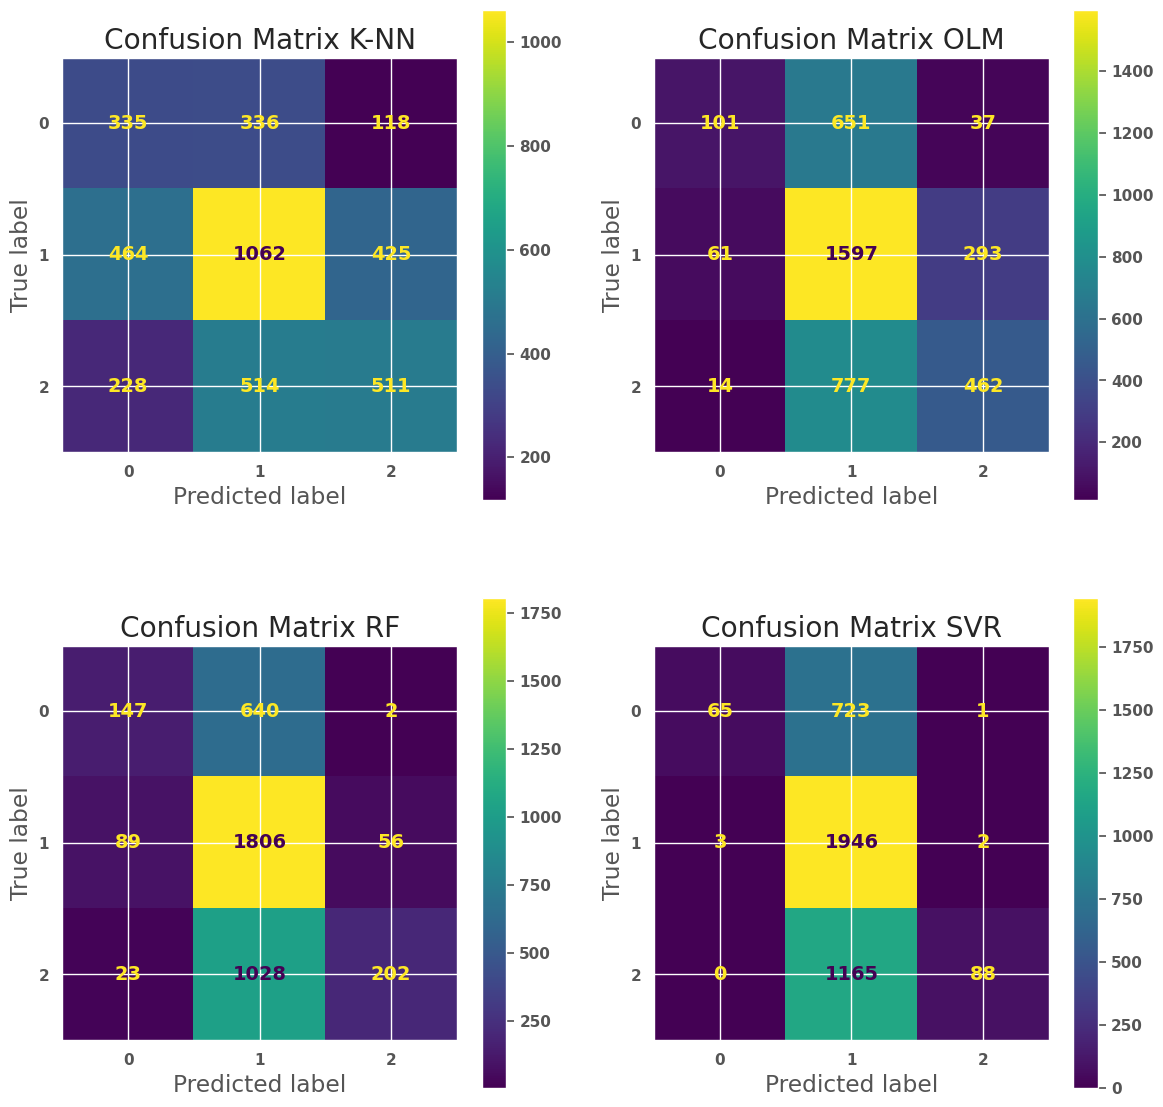

In [67]:
font = {'family' : 'DejaVu Sans',
    'weight' : 'bold',
    'size'   : 14}
plt.rc('font', **font)

fig, ax = plt.subplots(2,2, figsize = (14,14))

ax[0,0].set_title("Confusion Matrix K-NN")
ConfusionMatrixDisplay(cm_knn_final).plot(ax=ax[0,0])

ax[0,1].set_title("Confusion Matrix OLM")
ConfusionMatrixDisplay(cm_olm_final).plot(ax=ax[0,1])

ax[1,0].set_title("Confusion Matrix RF")
ConfusionMatrixDisplay(cm_rf_final).plot(ax=ax[1,0])

ax[1,1].set_title("Confusion Matrix SVR")
ConfusionMatrixDisplay(cm_svr_final).plot(ax=ax[1,1])